# <center> Regularized Linear Regression from Scratch </center> <br> <center> Wyatt Walsh </center>


First, necessary libraries must be imported.

In [32]:
#Import statements
import numpy as np
from math import *
import pandas as pd 

# %matplotlib inline
# from mpl_toolkits.mplot3d import Axes3D
# import matplotlib.pyplot as plt

Next, the data is loaded into a pandas DataFrame and basic cleaning is carried out.

In [28]:
#Loading in data and viewing first few rows
wine_data = pd.read_csv('winequality-red.csv', sep = ';')
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Before further modeling, the data should be split into training and test sets so that the accuracy of final models can be assessed.

In [38]:
def test_train_split(df):
    shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)
    split = floor(len(shuffled) * 0.8)
    train = shuffled.iloc[:split,]
    test = shuffled.iloc[split:,].reset_index(drop=True)
    return (train, test)
train,test = test_train_split(wine_data)
display(train)
test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.7,0.56,0.08,2.50,0.114,14.0,46.0,0.99710,3.24,0.66,9.6,6
1,7.8,0.50,0.17,1.60,0.082,21.0,102.0,0.99600,3.39,0.48,9.5,5
2,10.7,0.67,0.22,2.70,0.107,17.0,34.0,1.00040,3.28,0.98,9.9,6
3,8.5,0.46,0.31,2.25,0.078,32.0,58.0,0.99800,3.33,0.54,9.8,5
4,6.7,0.46,0.24,1.70,0.077,18.0,34.0,0.99480,3.39,0.60,10.6,6
...,...,...,...,...,...,...,...,...,...,...,...,...
1274,8.5,0.28,0.56,1.80,0.092,35.0,103.0,0.99690,3.30,0.75,10.5,7
1275,7.2,0.35,0.26,1.80,0.083,33.0,75.0,0.99680,3.40,0.58,9.5,6
1276,5.6,0.31,0.78,13.90,0.074,23.0,92.0,0.99677,3.39,0.48,10.5,6
1277,7.5,0.55,0.24,2.00,0.078,10.0,28.0,0.99830,3.45,0.78,9.5,6


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,8.0,0.280,0.44,1.8,0.081,28.0,68.0,0.99501,3.36,0.66,11.2,5
1,7.0,0.500,0.14,1.8,0.078,10.0,23.0,0.99636,3.53,0.61,10.4,5
2,6.0,0.500,0.00,1.4,0.057,15.0,26.0,0.99448,3.36,0.45,9.5,5
3,8.0,0.590,0.05,2.0,0.089,12.0,32.0,0.99735,3.36,0.61,10.0,5
4,6.5,0.530,0.06,2.0,0.063,29.0,44.0,0.99489,3.38,0.83,10.3,6
...,...,...,...,...,...,...,...,...,...,...,...,...
315,9.1,0.600,0.00,1.9,0.058,5.0,10.0,0.99770,3.18,0.63,10.4,6
316,8.2,0.635,0.10,2.1,0.073,25.0,60.0,0.99638,3.29,0.75,10.9,6
317,7.2,0.620,0.06,2.7,0.077,15.0,85.0,0.99746,3.51,0.54,9.5,5
318,7.9,0.200,0.35,1.7,0.054,7.0,15.0,0.99458,3.32,0.80,11.9,7


An examination of the data yields a need for pre-processing of the data. This will take the form of standardization of the predictors to ensure they are of similar scale for use in regression. 

In [40]:
def standardize(train, test):
    """Uses the equation for standardization 
    {(value - mean(value))/(sd of value)} on the predictors.
    This gives the data a mean of 0 and variance of 1"""
    train = train.copy()
    train_mean = np.mean(train, axis=0)
    train_std = np.std(train, axis = 0)
    train = (train - train_mean) / train_std
    test = (test - train_mean) / train_std
    return train, test
std_train, std_test = standardize(train, test)
display(std_train)
std_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.355925,0.183486,-0.991244,-0.021501,0.543267,-0.170766,-0.010943,0.176673,-0.454824,0.016453,-0.746108,0.447402
1,-0.298879,-0.149313,-0.521572,-0.644914,-0.121610,0.501707,1.681875,-0.399688,0.511703,-1.075135,-0.839755,-0.780553
2,1.355460,0.793616,-0.260643,0.117036,0.397825,0.117437,-0.373690,1.905757,-0.197084,1.957054,-0.465169,0.447402
3,0.100444,-0.371178,0.209029,-0.194671,-0.204720,1.558449,0.351804,0.648242,0.125092,-0.711272,-0.558815,-0.780553
4,-0.926387,-0.371178,-0.156272,-0.575646,-0.225497,0.213504,-0.373690,-1.028446,0.511703,-0.347410,0.190356,0.447402
...,...,...,...,...,...,...,...,...,...,...,...,...
1274,0.100444,-1.369574,1.513674,-0.506378,0.086164,1.846651,1.712104,0.071880,-0.068214,0.562247,0.096709,1.675357
1275,-0.641156,-0.981309,-0.051900,-0.506378,-0.100833,1.654516,0.865695,0.019484,0.576138,-0.468697,-0.839755,0.447402
1276,-1.553895,-1.203174,2.661761,7.875067,-0.287830,0.693842,1.379586,0.003765,0.511703,-1.075135,0.096709,0.447402
1277,-0.470018,0.128019,-0.156272,-0.367841,-0.204720,-0.555036,-0.555063,0.805431,0.898314,0.744178,-0.839755,0.447402


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.184787,-1.369574,0.887444,-0.506378,-0.142388,1.174179,0.654093,-0.918413,0.318397,0.016453,0.752234,-0.780553
1,-0.755248,-0.149313,-0.678130,-0.506378,-0.204720,-0.555036,-0.706208,-0.211061,1.413795,-0.286766,0.003063,-0.780553
2,-1.325710,-0.149313,-1.408731,-0.783450,-0.641046,-0.074698,-0.615521,-1.196115,0.318397,-1.257066,-0.839755,-0.780553
3,-0.184787,0.349885,-1.147802,-0.367841,0.023831,-0.362901,-0.434147,0.307664,0.318397,-0.286766,-0.371523,-0.780553
4,-1.040479,0.017087,-1.095616,-0.367841,-0.516381,1.270247,-0.071401,-0.981289,0.447268,1.047397,-0.090583,0.447402
...,...,...,...,...,...,...,...,...,...,...,...,...
315,0.442721,0.405351,-1.408731,-0.437110,-0.620268,-1.035373,-1.099183,0.491052,-0.841435,-0.165478,0.003063,0.447402
316,-0.070694,0.599484,-0.886873,-0.298573,-0.308607,0.885977,0.412262,-0.200581,-0.132649,0.562247,0.471295,0.447402
317,-0.641156,0.516284,-1.095616,0.117036,-0.225497,-0.074698,1.167984,0.365301,1.284925,-0.711272,-0.839755,-0.780553
318,-0.241833,-1.813305,0.417772,-0.575646,-0.703378,-0.843238,-0.948039,-1.143718,0.060657,0.865466,1.407759,1.675357


In [16]:
def unstandardize(B):
    """Unstandardizes coefficients by multiplying by sd of 
    y divided by sd of the x column associated with the coefficient. 
    Also unstandardizes the intercept by subtracting B* mean of X 
    from mean of Y"""
    intercept = B[0]
    coeffs = B[1:]
    for i in np.arange(len(coeffs)):
        coeffs[i] = coeffs[i] * 
        (np.std(wine_data.iloc[:,-1].values)/
         np.std(wine_data.iloc[:,i].values))
    intercept = intercept - np.dot(np.mean(wine_data.iloc[:,0:-1].values,0)
                                   ,coeffs)
    return np.append(intercept,coeffs)

In order to examine possible multicollinearity of the predictors, a function for variance inflation factor (VIF) calculation is created that iteratively removes the highest scoring predictor with a score above 5. 

In [4]:
def VIF(df):
    """Computes the VIF for the X data in the dataframe.\
    VIF of 5 or more indicates multicollinearity among the data
    """
    VIF = np.zeros(len(df.columns))
    for i in np.arange(len(df.columns)-1):
        Y = df.iloc[:,i].values
        X = df.drop([df.columns[-1],df.columns[i]],1).values
        B= np.dot(np.linalg.inv(np.dot(np.transpose(X),X)),
                  (np.dot(np.transpose(X),Y)))
        Y_hat = np.dot(X,B) 
        Y_bar = np.mean(Y)
        SSR = np.dot(np.transpose(Y_hat - Y_bar), Y_hat - Y_bar)
        SSTO = np.dot(np.transpose(Y-Y_bar),Y-Y_bar)
        R2 = SSR/SSTO
        VIF[i] = 1/(1-R2)   
    if all(i < 5 for i in VIF):
        return "Good to go!",VIF
    else:
         return "Multicollinearity",VIF
        
VIF(wine_data)


('Good to go!',
 array([ 3.0736194 ,  1.75838425,  3.12756353,  1.09627117,  1.4706392 ,
         1.95006412,  2.17514747, -0.00512664,  2.24780735,  1.33993516,
         1.3120369 ,  0.        ]))

With the data pre-processing and evaluation step completing, computing different estimates of the model parameters can be conducted. 

Both Ordinary Least Squares (OLS) and Ridge Regression have closed form solutions for the values of the parameters that minimize the squared loss so those equations are solved and computed! 

\begin{align}
\begin{bmatrix}
    \hat{\beta}_0\\
    \hat{\beta}\\
\end{bmatrix}
&=
\arg\min_{\beta_0,\beta} \left\Vert\mathbf{Y}-\begin{bmatrix} \mathbf{1_n} & \mathbf{X} \end{bmatrix}\begin{bmatrix}
    \hat{\beta}_0\\
    \hat{\beta}\\
\end{bmatrix}\right\Vert^2 _2
\\
\begin{bmatrix}
    \hat{\beta}\\
\end{bmatrix}
&=
{(\mathbf{X'}\mathbf{X}})^{-1} (\mathbf{X'}\mathbf{Y})
\end{align}

In [5]:
def ols(df):
    """This function takes in a dataframe with x data and 
    y data as the last column.It then proceeds to return the 
    OLS estimates for the different parameters using the 
    closed form solution"""
    X = np.append(np.ones((len(df),1)),df.iloc[:,0:-1].values,1)
    Y = df.iloc[:,-1].values
    n = len(df)
    B= np.dot(np.linalg.inv(np.dot(np.transpose(X),X)),
              (np.dot(np.transpose(X),Y)))
    return B

In [6]:
def ridge_regression(df,µ):
    """Augments data with a 1 column and a 
    diag(square root of lambda*I) then computes OLS"""
    upper_half = np.append(np.ones((len(df),1)),
                           df.iloc[:,0:-1].values,1)
    lower_half = np.append(np.zeros((len(df.columns)-1,1)), 
                           np.sqrt(µ)* 
                           np.identity(len(df.columns)-1),1)
    X = np.append(upper_half,lower_half,0)
    Y = np.append(df.iloc[:,-1].values,np.zeros(
        len(df.columns)-1),0)
    B = np.dot(np.linalg.inv(np.dot(np.transpose(X),X)),
               (np.dot(np.transpose(X),Y)))
    return B

Lasso Regression and the Elastic Net however do not have closed form solutions due to the nature of the L1 norm penalization term. This means that discrete optimization methods are needed in order to compute the regression estimates using these regularization techniques. Currently one of the best algorithms to accomplish this is Coordinate Descent that incorporates warm starts and covariance/naive updates.

In [9]:
def lasso_regression_covar(df,µ,µ_path = np.array([])):
    """Solves lasso regression. Since no closed form solution 
    exists we must use optimization to solve for the parameters. 
    Here we implement coordinate descent (CD) with warm starts 
    utilizing an equation for µ_max so that we can create a log 
    spaced vector for µ. Using the CD update we iterate until 
    the coeffiecients converge and stabilize."""
    
    df_std = standardize(df)
    X = np.append(np.ones((len(df),1)),df_std.iloc[:,0:-1].values,1)
    Y = df.iloc[:,-1].values
    N = np.shape(X)[0]
    
    B_star = np.zeros((np.shape(X)[1]))
    
    µ_max = max(list(abs(np.dot(np.transpose(X),Y))))/len(df)
    
    if µ_path.size == 0:
        if µ == 0:
            µ_ = np.append(np.geomspace(µ_max,µ+1e-10,99),0)
        else: 
            µ_ = np.geomspace(µ_max,µ,100)
    else:   
        µ_ = µ_path
        
    tot_coeff = np.zeros((len(µ_),len(B_star)))  
    
    for i in np.arange(len(µ_)):
        while True:
            B_s = B_star
            for j in np.arange(len(B_s)):
                k = np.where(B_s!= 0)[0]
                update = (1/N)*((np.dot(np.transpose(X[:,j]),Y) - 
                                 np.dot(np.dot(np.transpose(X[:,j]),X[:,k]),B_s[k])))+B_s[j]
                B_star[j] = (np.sign(update)*max(abs(update)-µ_[i],0))
            tot_coeff[i,:] = B_star
            if np.all(np.absolute(np.subtract(B_s, B_star)) < 1e-3):
                break
    return B_star, tot_coeff

In [11]:
def elastic_net(df,µ,alpha,µ_path = np.array([])): 
    """Solves elastic net regression. Since no closed form solution exists 
    we must use optimization to solve for the parameters. Here we implement 
    coordinate descent (CD) with warm starts utilizing an equation for µ_max 
    so that we can create a log spaced vector for µ. Using the CD update we 
    iterate until the coeffiecients converge and stabilize."""
    dff = standardize(df)
    X = np.append(np.ones((len(df),1)),dff.iloc[:,0:-1].values,1)
    Y = df.iloc[:,-1].values
    N = len(df)
    if alpha == 0:
        alpha = 1e-15
    
    µ_max = max(list(abs(np.dot(np.transpose(X),Y))))/len(df)/alpha
    
    if µ_path.size == 0:
        if µ == 0:
            µ_ = np.append(np.geomspace(µ_max,µ+1e-10,99),0)
        else: 
            µ_ = np.geomspace(µ_max,µ,100)
    else:   
        µ_ = µ_path
        
    B_star = np.zeros(np.shape(X)[1])
    
    tot_coeff = np.zeros((len(µ_),len(B_star)))  
    
    for i in np.arange(len(µ_)):
        while True:
            B_s = B_star
            for j in np.arange(len(B_s)):
                k = np.where(B_s!= 0)[0]
                update = (1/N)*((np.dot(np.transpose(X[:,j]),Y) - 
                                 np.dot(np.dot(np.transpose(X[:,j]), X[:,k]),B_s[k]))) + B_s[j]
                B_star[j] = (np.sign(update)*
                             max(abs(update)-(alpha*µ_[i]),0)) / (1+(µ_[i]*(1-alpha)))
            tot_coeff[i,:] = B_star
            if np.all(np.absolute(np.subtract(B_s, B_star)) < 1e-6):
                break
    return B_star,tot_coeff,µ_

Now, in order to find the correct tuning parameters for Ridge, Lasso, and the Elastic Net we implement K-fold Cross Validation. We use a k = 10 since our data set is only 1599 entries, and make our grid spacing on a log scale for lambda and a log scale for alpha (in the case of the Elastic Net)

In [22]:
def cross_validation(df, k, n, Type = 'ridge'):
    """This function uses K-Fold C.V. to choose tuning parameters for 
    the different regression techniques. It not only returns the 
    best parameters, but also the parameters tested, the coeefficients 
    associated with them, the minimum error, and the error for each 
    parameter for the last fold."""
    indices = np.arange(len(df))
    np.random.shuffle(indices)
    sets = np.array_split(indices, k)
    X = df.iloc[:,0:-1].values
    Y = df.iloc[:,-1].values
    
    if Type == 'ols':
        err = 0
        for i in np.arange(k):
                train_indices = [p for p in indices if p not in sets[i]]
                train_data = df.iloc[train_indices,:]
                test_data = df.iloc[sets[i],:]
                B = ols(train_data)
                y_hat = np.dot(test_data.iloc[:,0:-1],B[1:])+B[0]
                err = err + np.linalg.norm(test_data.iloc[:,-1]-y_hat)**2
        err = (1/k)*err
        return err
    
    elif Type == 'ridge' :
        µ = np.geomspace(1e-2,1e5,n)
        err = np.zeros(n)
        coeff = np.zeros((n,11))
        for i in np.arange(k):
            for j in np.arange(len(µ)):
                train_indices = [p for p in indices if p not in sets[i]]
                train_data = df.iloc[train_indices,:]
                test_data = df.iloc[sets[i],:]
                B = ridge_regression(train_data, µ[j])
                coeff[j,:] = B[1:]
                y_hat = np.dot(test_data.iloc[:,0:-1],B[1:])+B[0]
                err[j] = err[j] + 
                np.linalg.norm(test_data.iloc[:,-1]-y_hat)**2
        err = (1/k)*err
        z = np.argmin(err)
        µ_star = µ[z]
        return µ_star,min(err),err,µ, coeff
            
    elif Type == 'lasso':
        err = np.zeros(n)
        for i in np.arange(k):
            train_indices = [p for p in indices if p not in sets[i]]
            train_data = df.iloc[train_indices,:]
            test_data = df.iloc[sets[i],:]
            train_data_std = standardize(train_data)
            X = train_data_std.iloc[:,0:-1].values
            Y = train_data_std.iloc[:,-1].values
            µ_max = max(list(abs(np.dot(np.transpose(X),Y)))) /
            len(train_data_std)
            µ_ = np.geomspace(µ_max,µ_max*0.0001,n)
            B = lasso_regression_covar(train_data,1,µ_ )[1]
            for j in np.arange(len(µ_)):
                B_ = B[j]
                y_hat =  B_[0]+np.dot(standardize(test_data.iloc[:,0:-1]),
                                      B_[1:])
                err[j] = err[j] + np.linalg.norm(test_data.iloc[:,-1]-
                                                 y_hat)**2
        err = (1/k)*err
        z = np.argmin(err)
        µ_star = µ_[z]
        return µ_star,min(err),err,µ_,B
            
    elif Type == 'elastic net' or 'elasticnet' 
        or 'elastic_net' or 'elastic-net':
        err = np.zeros((n,n))
        alpha =  np.geomspace(1,1e-6,n)
        tot_coeff = np.zeros((n,n,12))
        tot_µ = np.zeros((n,n))
        for i in np.arange(k):
            train_indices = [p for p in indices if p not in sets[i]]
            train_data = df.iloc[train_indices,:]
            test_data = df.iloc[sets[i],:]
            train_data_std = standardize(train_data)
            X = train_data_std.iloc[:,0:-1].values
            Y = train_data_std.iloc[:,-1].values
            for j in np.arange(n):
                µ_max = max(list(abs(np.dot(np.transpose(X),Y))))/
                    len(train_data_std)/(alpha[j])
                µ = np.geomspace(µ_max,µ_max*0.001,n)
                tot_µ[j,:] = µ 
                B = elastic_net(train_data,1,alpha[j],µ)[1] 
                tot_coeff[j,:,:] = B
                for m in np.arange(n):
                    B_ = B[m]
                    y_hat = np.dot(standardize(test_data.iloc[:,0:-1]),
                                   B_[1:])+B_[0]
                    err[j,m] = err[j,m] + 
                        np.linalg.norm(test_data.iloc[:,-1]-
        err = (1/k)*err
        indice = np.unravel_index(err.argmin(),err.shape)
        alpha_star = alpha[indice[0]]
        µ_star = µ[indice[1]]
        return µ_star, alpha_star, min(err.flatten()), 
                                       err, tot_µ,alpha,tot_coeff
    else:
        print("wrong command; must be: ridge, lasso, or elastic net")

In [29]:
ols_est = cross_validation(wine_data,10,1,Type = 'ols')
ridge = cross_validation(wine_data,10,100,Type = 'ridge')
lasso = cross_validation(wine_data,10,100, Type = 'lasso')
elastic = cross_validation(wine_data,10,100, Type = 'elastic net')

In [32]:
pd.DataFrame(index = ["OLS","Ridge","Lasso","Elastic Net"], 
              data = ({"Cross Validation Error": [ols_est,ridge[1],
                                                  lasso[1],elastic[2]]}))

,Cross Validation Error
OLS,68.261418
Ridge,67.764864
Lasso,68.660435
Elastic Net,68.228127


In [33]:
indice_alpha = np.where(elastic[5] == elastic[1])[0][0]
indice_lambda = np.where(elastic[4] == elastic[0])[0][0]
columns = np.append('Intercept', wine_data.columns.values[0:-1])
index = ["OLS","Ridge","Lasso standardized","Lasso unstandardized",\
         "Elastic Net standardized","Elastic Net unstandardized"]
data = np.append(np.append(np.append(
    np.append(np.append([ols(wine_data)], \ [ridge_regression(
        wine_data,ridge[0])],0), \ [lasso_regression_covar(
        wine_data,lasso[0])[0]],0),\ [unstandardize(
        lasso_regression_covar(wine_data,lasso[0])[0])],0),\
                 [elastic[-1][indice_alpha,:][indice_lambda,:]],0),\
                 [unstandardize(
    elastic[-1][indice_alpha,:][indice_lambda,:])],0)

pd.DataFrame(data = data, index = index, columns = columns)

,Intercept,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
OLS,21.965208,0.024991,-1.083590,-0.182564,0.016331,-1.874225,0.004361,-0.003265,-17.881164,-0.413653,0.916334,0.276198
Ridge,4.468275,0.009593,-1.101015,-0.189520,0.008667,-1.767540,0.004500,-0.003286,-0.090792,-0.488105,0.875236,0.294053
Lasso standardized,5.635976,0.041431,-0.193897,-0.035235,0.022385,-0.088338,0.045646,-0.107454,-0.032028,-0.064814,0.155058,0.295092
Lasso unstandardized,18.109344,0.019217,-0.874485,-0.146073,0.012822,-1.515742,0.003524,-0.002638,-13.704464,-0.339029,0.738731,0.223622
Elastic Net standardized,5.592131,0.005304,-0.193141,-0.000000,0.000000,-0.081815,0.002935,-0.050908,-0.000000,-0.033711,0.141801,0.300930
Elastic Net unstandardized,3.971026,0.002460,-0.871078,-0.000000,0.000000,-1.403813,0.000227,-0.001250,-0.000000,-0.176338,0.675573,0.228046


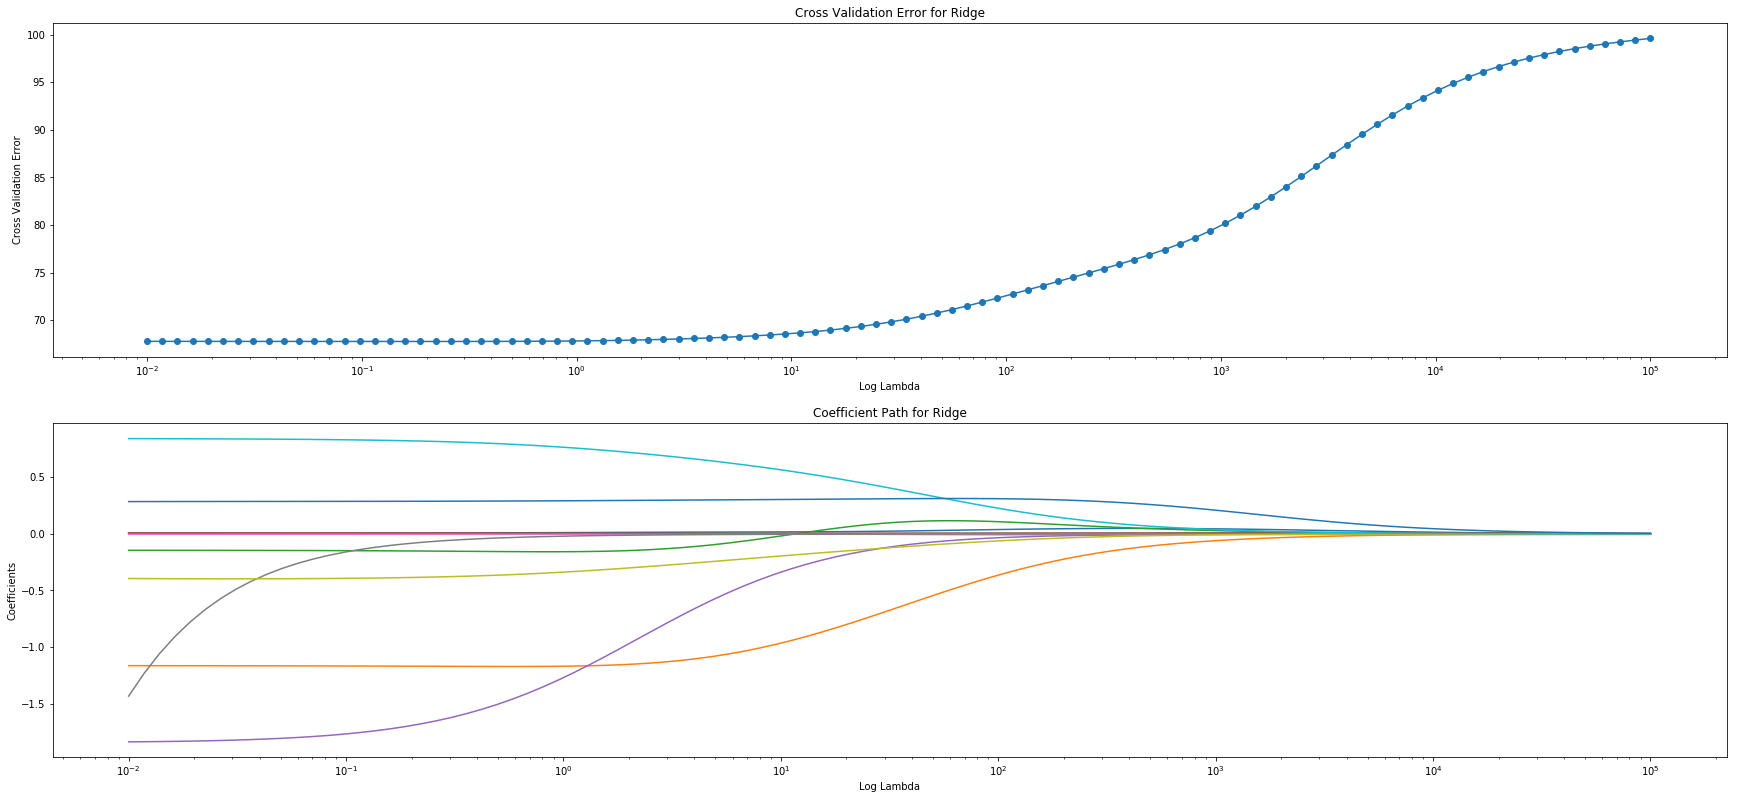

In [34]:
#Plot tuning parameters versus error and tuning parameters 
#versus coefficient value
fig = plt.figure(figsize=(20*1.5,9*1.5))
fig.tight_layout()

rid = fig.add_subplot(211)
rid.scatter(ridge[3], ridge[2])
rid.plot(ridge[3], ridge[2])
rid.set_xscale('log')
rid.set_xlabel('Log Lambda')
rid.set_ylabel("Cross Validation Error")
rid.set_title('Cross Validation Error for Ridge')

rid_coeff = fig.add_subplot(212)
rid_coeff.set_xlabel('Log Lambda')
rid_coeff.set_ylabel("Coefficients")
rid_coeff.set_title("Coefficient Path for Ridge")
for i in np.arange(1,12):
    rid_coeff.plot(ridge[3],ridge[4][:,i-1])
    rid_coeff.set_xscale('log')



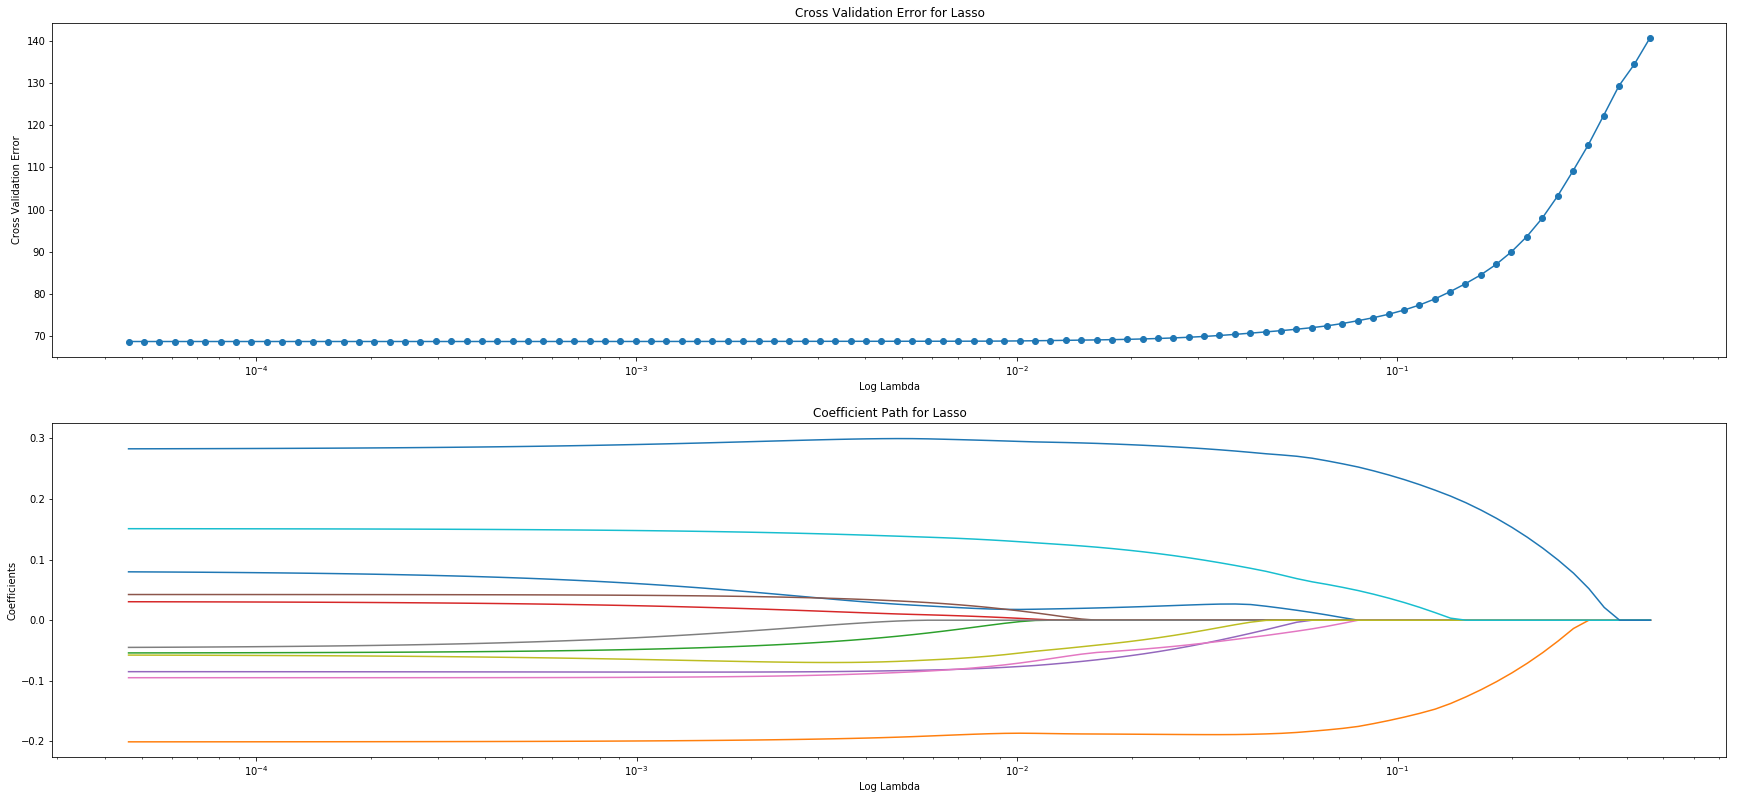

In [35]:
#Plot tuning parameters versus error and tuning parameters 
#versus coefficient value
fig2 = plt.figure(figsize=(20*1.5,9*1.5))
fig2.tight_layout()

las = fig2.add_subplot(211)
las.scatter(lasso[3], lasso[2])
las.plot(lasso[3], lasso[2])
las.set_xscale('log')
las.set_xlabel('Log Lambda')
las.set_ylabel("Cross Validation Error")
las.set_title('Cross Validation Error for Lasso')

las_coeff = fig2.add_subplot(212)
las_coeff.set_xlabel('Log Lambda')
las_coeff.set_ylabel("Coefficients")
las_coeff.set_title("Coefficient Path for Lasso")
for i in np.arange(1,12):
    las_coeff.plot(lasso[3],lasso[4][:,i])
    las_coeff.set_xscale('log')
    

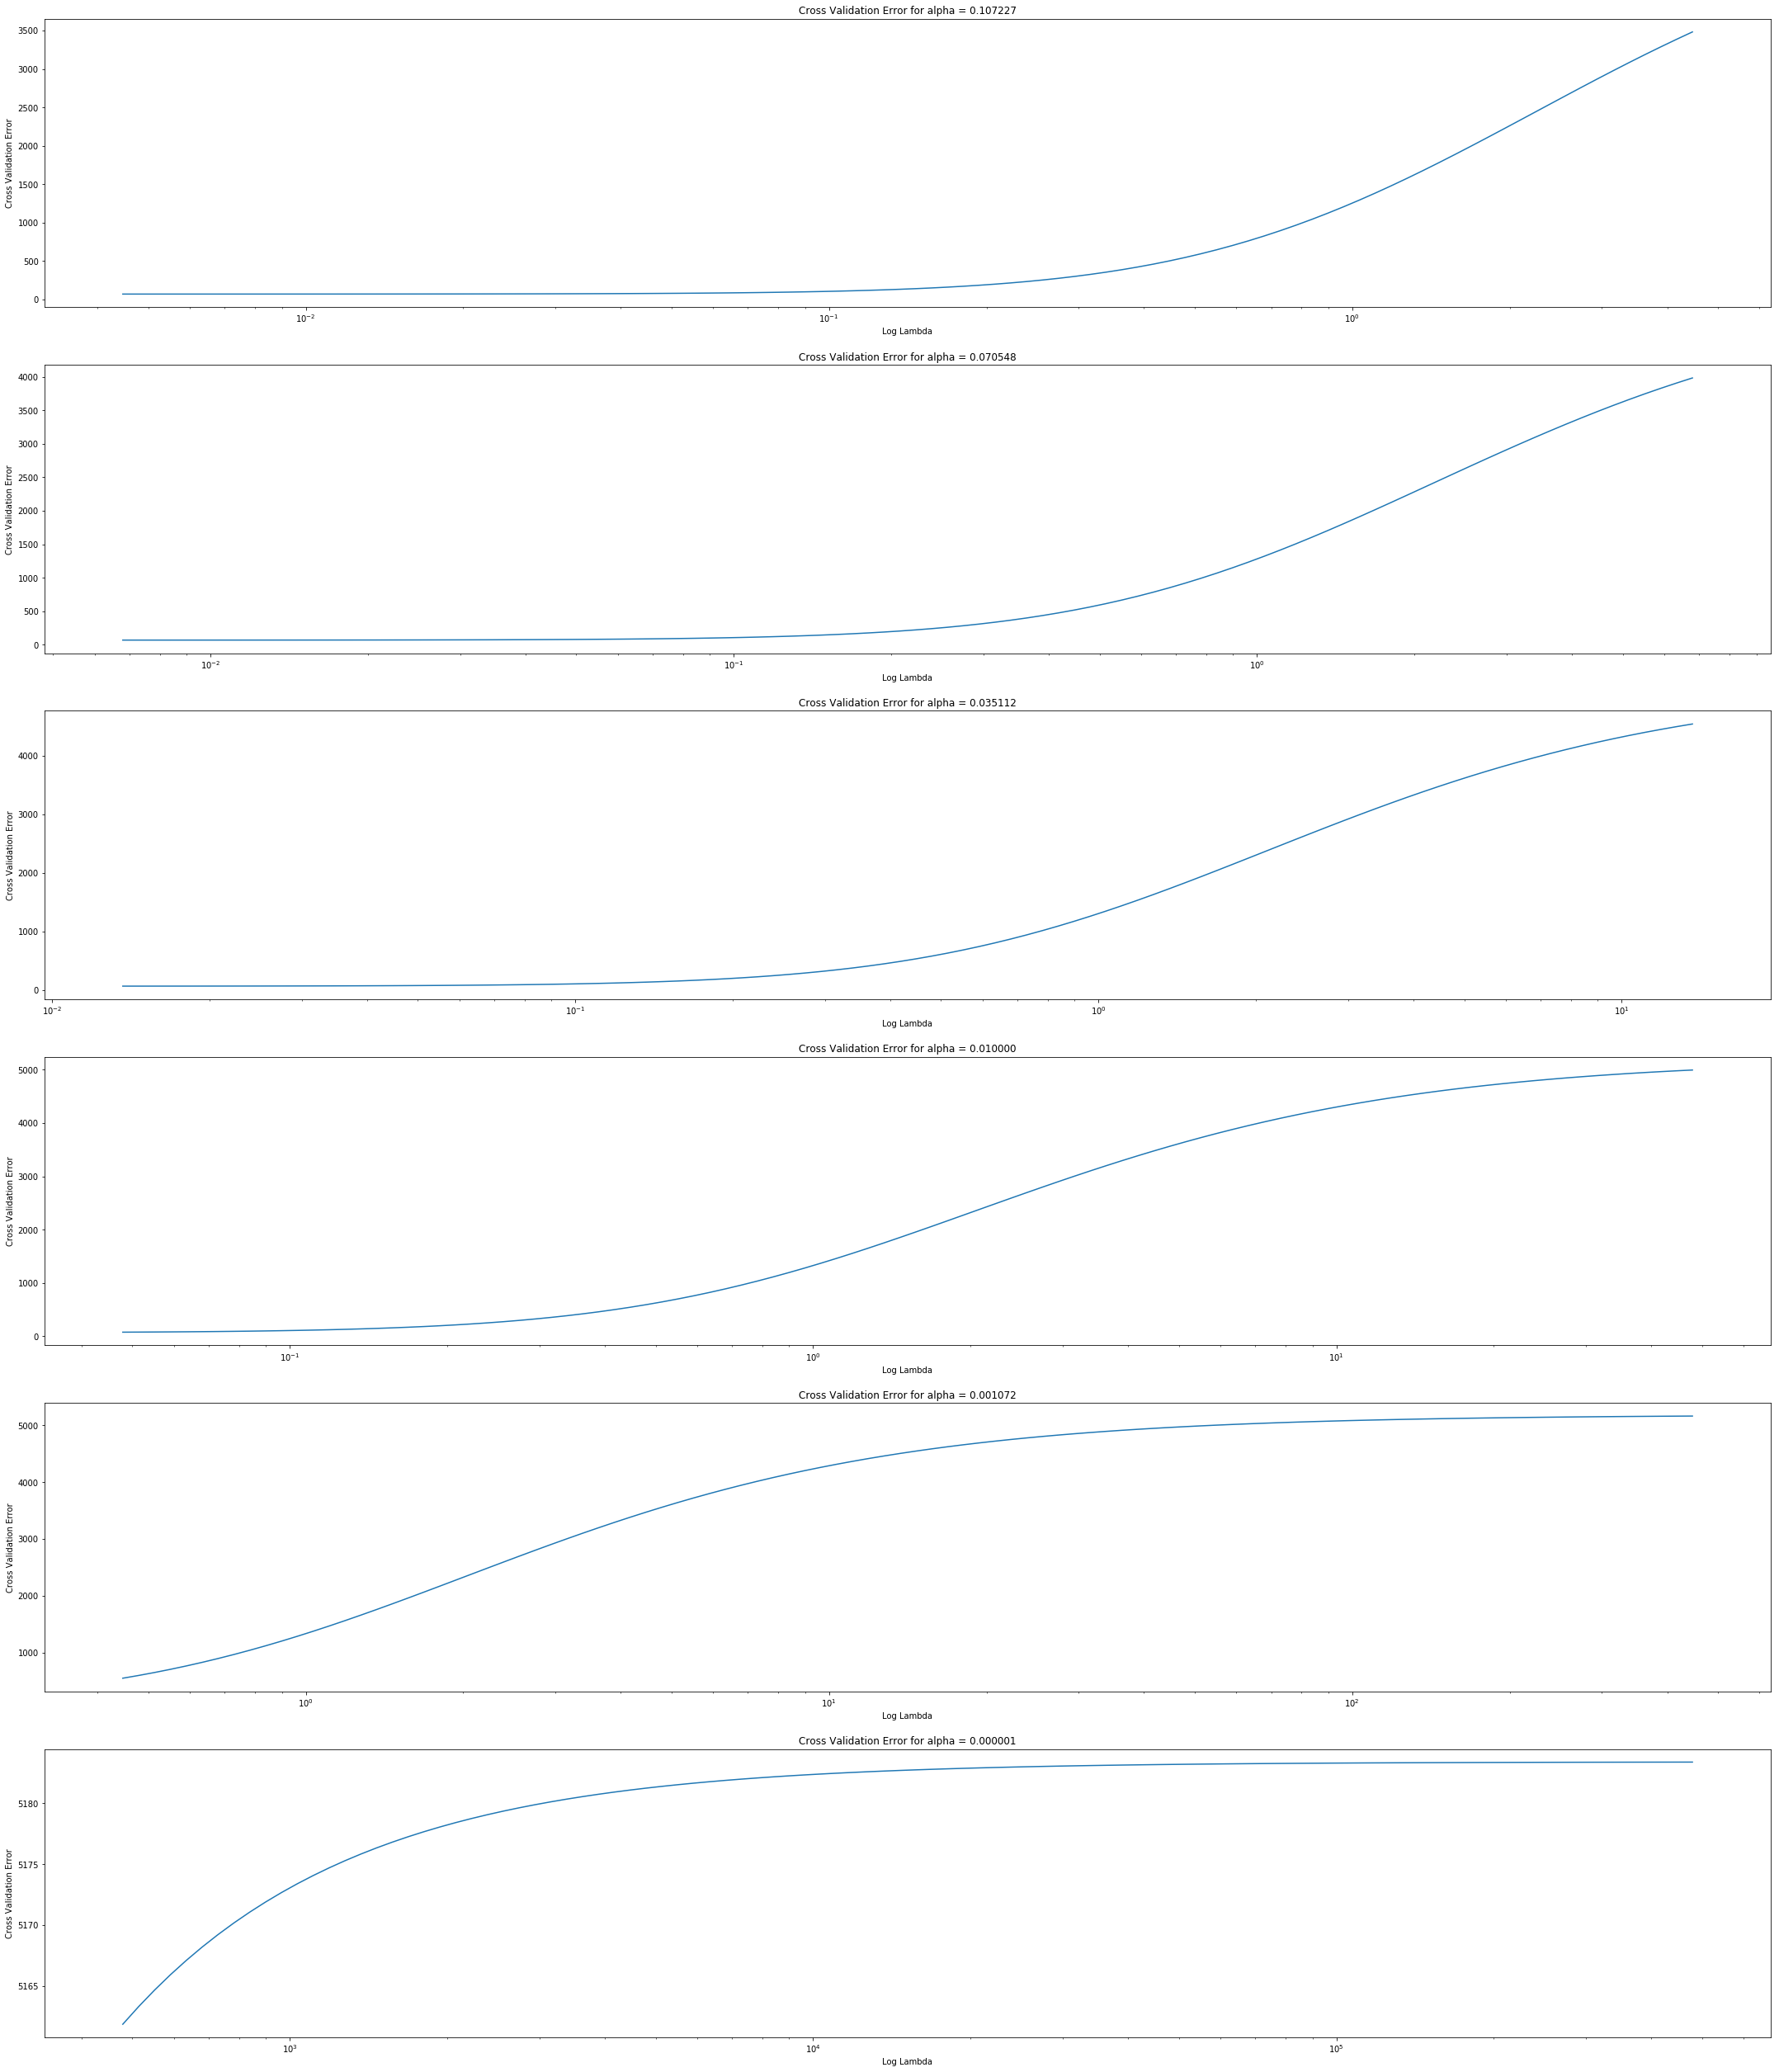

In [36]:
fig4,axs = plt.subplots(6,1,figsize = (25*1.5,30*1.5))

axs = axs.ravel()
for i in np.arange(1,7):
    X = elastic[4][int(99/(7-i)),:]
    Y = elastic[3][int(99/(7-i)),:]
    alpha = elastic[5][int(99/(7-i))]
    axs[i-1].plot(X,Y)
    axs[i-1].set_xscale('log')
    axs[i-1].set_xlabel('Log Lambda')
    axs[i-1].set_ylabel("Cross Validation Error")
    axs[i-1].set_title('Cross Validation Error for alpha = %f' %alpha)

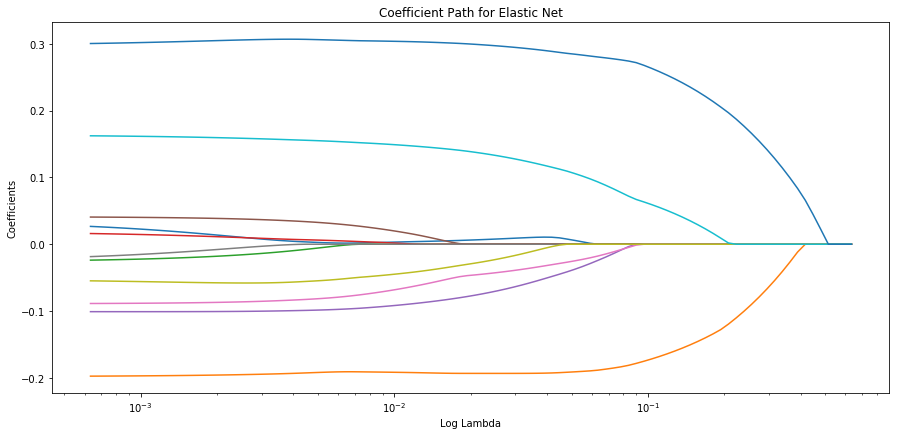

In [31]:
fig5 = plt.figure(figsize=(15,15))

elas_coeff = fig5.add_subplot(212)
elas_coeff.set_xlabel('Log Lambda')
elas_coeff.set_ylabel("Coefficients")
elas_coeff.set_title("Coefficient Path for Elastic Net")

indice = np.where(elastic[5] == elastic[1])[0][0]
for i in np.arange(1,12):
    elas_coeff.plot(elastic[4][indice,:],elastic[-1][indice,:][:,i])
    elas_coeff.set_xscale('log')